# Titanic:Predict survival on the Titanic

We learn with the legendary Titanic ML competition on Kaggele

## Approach in solving a ML related problem

<p align="center" text-align="center">
  <img width='800' src="https://drive.google.com/uc?id=15HWx9FyMSPpocQbRM9zAzPqZuw0cuI5c">
</p>

### 01. Understanding the Problem and Objective setting

**Background**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


**Problem**

In this challenge, we ask you to build a **predictive model** that answers the question: “**what sorts of people were more likely to survive?**” using passenger data (ie name, age, gender, socio-economic class, etc).

### Collecting Data and EDA

#### Collecting Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Create a Folder manually in your drive
# Navigate to that folder
%cd drive/My\ Drive/Titanic

/content/drive/My Drive/Titanic


In [ ]:
# You can upload data manually to your drive, or use wget if you are taking 
# from an internet based source.
# Here, We will download the data directly from the Kaggle site

# Remember to replace USERNAME and KAGGLETOKEN variables with your own ones
# To get the token, click the profile picture --> goto My Account --> click 
# "Create New API Token" under API section. It will download a JSON with username
# and your key

# import os
# os.environ['KAGGLE_USERNAME'] = "savindiwijenayaka"
# os.environ['KAGGLE_KEY'] = "b265b80874e2c37a5032ec9fa8c83e7f"

# !kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 4.29MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 441kB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 8.43MB/s]


#### EDA (Exploratory Data Analysis)

In [ ]:
# Libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import mlab
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read CSV (Comma Separated File) as a Pandas DataFrame
train=pd.read_csv("train.csv")                              # Train set
test=pd.read_csv("test.csv")                                # Test set
# gender_submission=pd.read_csv("gender_submission.csv")      # Sample submission file

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


**Tensors**

Tensors are multi-dimentional arrays of elements

* Rank 0 : **Scalar** (Single Value --> Ex. 103)      
* Rank 1 : **Vector** (1D Array     --> Ex. [1,2,3])
* Rank 2 : **Matrix** (2D Array     --> Ex. [[1,2,3],[4,5,6]])
* Rank 3 and above : **Tensor** (Higher Dimentional Array)
  
  Ex: 
  
      [ [[5, 12, 23, 24, 1],
         [5, 12, 23, 24, 1],
         [5, 12, 23, 24, 1]],
      
        [[5, 12, 23, 24, 1],
         [5, 12, 23, 24, 1],
         [5, 12, 23, 24, 1]] ]

<p align="center" text-align="center">
  <img width='800' src="https://drive.google.com/uc?id=1d2dhHejtUvGzU06Jd1b1JIWJJHRc2SiY">
</p>




In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p align="center" text-align="center">
  <img width='1000' src="https://drive.google.com/uc?id=1ARd60SGpWanp5-SlasDtfMUiFx4mDGaG">
</p>

<p align="center" text-align="center">
  <img width='1000' src="https://drive.google.com/uc?id=18Srnwwaz6GGe8xI6uFL3pTdqP659Lb0l">
</p>




You can see that there are null values presented in certain fields as total number of records are 891

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Similarly, there are null values presented in certain fields of test set as well because total number of records are 418



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


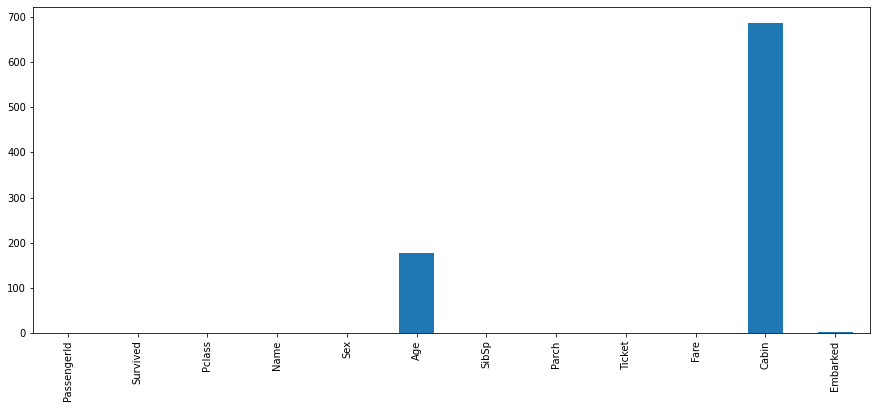

In [ ]:
# Calculate missing values
total_null_values_by_column = train.isna().sum()
print(total_null_values_by_column)

# Visualize missing values
total_null_values_by_column.plot(kind='bar', figsize=(15,6))
plt.show()

**We can see that Age, Cabin, and Embarked fields have null values**

In [ ]:
# Lets check the destribution of values in Age column
train.Age.value_counts()
# train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [ ]:
# Output is truncated. Lets adjust the settings to see full output and run the above  code again
pd.set_option('display.max_rows', 100)
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
44.00     9
48.00     9
54.00     8
9.00      8
1.00      7
51.00     7
52.00     6
14.00     6
3.00      6
49.00     6
41.00     6
37.00     6
15.00     5
43.00     5
58.00     5
11.00     4
62.00     4
60.00     4
8.00      4
56.00     4
5.00      4
46.00     3
65.00     3
7.00      3
6.00      3
61.00     3
55.00     2
28.50     2
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.5

There are decimal values in the dataset. Which is not really important in "Age" like data. So lets just convert all float values to int

In [ ]:
train.Age = train.Age.astype(int)

ValueError: ignored

Since we have null fields, we cannot convert the column to int yet. We have to take care of the null values first

##### Handling null values

There are around 7 ways to handle missing values in the dataset:

1. Deleting Rows with missing values
2. Impute missing values for continuous variable (Replace with Mean/Median)
3. Impute missing values for categorical variable (Replace with most frequent category)
4. Other Imputation Methods (time-series-use the interpolation of the variable before and after a timestamp, if a missing value is a categorical variable and there are lot of them, create another category etc.)
5. Using Algorithms that support missing values
6. Prediction of missing values (more suitable when number of missing values are larger)
7. Imputation using Deep Learning Library — Datawig

Lets calculate the statistical values of the Age data and impute(fill) using mean or median

In [ ]:
df = train['Age'].describe()
print(df)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


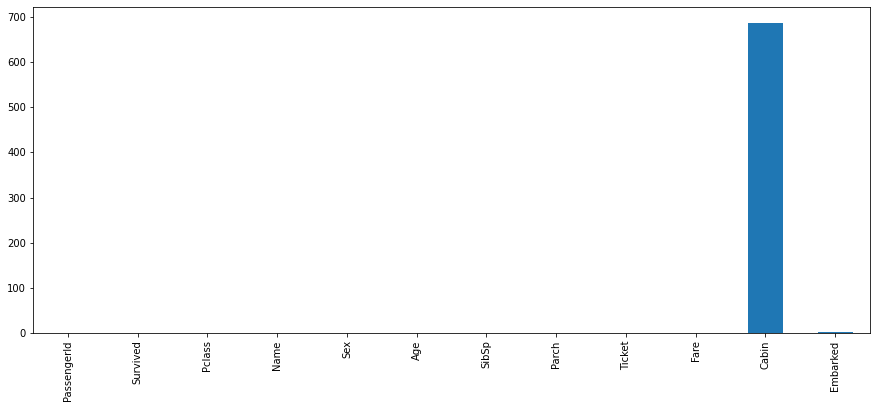

In [ ]:
# Lets pick 29 as the value to impute
values = {'Age': 29}
train.fillna(value=values, inplace=True)

# Calculate missing values
total_null_values_by_column = train.isna().sum()
print(total_null_values_by_column)

# Visualize missing values
total_null_values_by_column.plot(kind='bar', figsize=(15,6))
plt.show()

Now lets convert float to int

In [ ]:
train.Age = train.Age.astype(int)

In [ ]:
print(f"Number of unique values in Age column: {train.Age.nunique()} \n")
print("Unique values in Age column: \n")
np.sort(train.Age.unique())

Number of unique values in Age column: 71 

Unique values in Age column: 



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

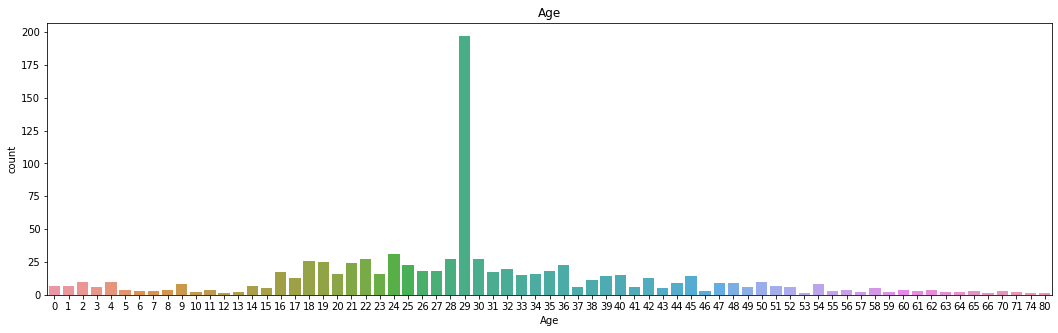

In [ ]:
# Lets check the destribution of values in Age column
plt.figure(figsize=(18,5))
sns.countplot(train['Age'])
plt.title('Age')
plt.show()

These can be further feature engineered. But lets stop here for now. And look at cabin feature


In [ ]:
df = train['Cabin'].describe()
print(df)
print()
print(f"Number of non values in Cabin column: {train.Cabin.isna().sum()} \n")
print(f"Number of unique values in Cabin column: {train.Cabin.nunique()} \n")
print("Unique values in Cabin column: \n")
print(train.Cabin.unique())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Number of non values in Cabin column: 687 

Number of unique values in Cabin column: 147 

Unique values in Cabin column: 

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 

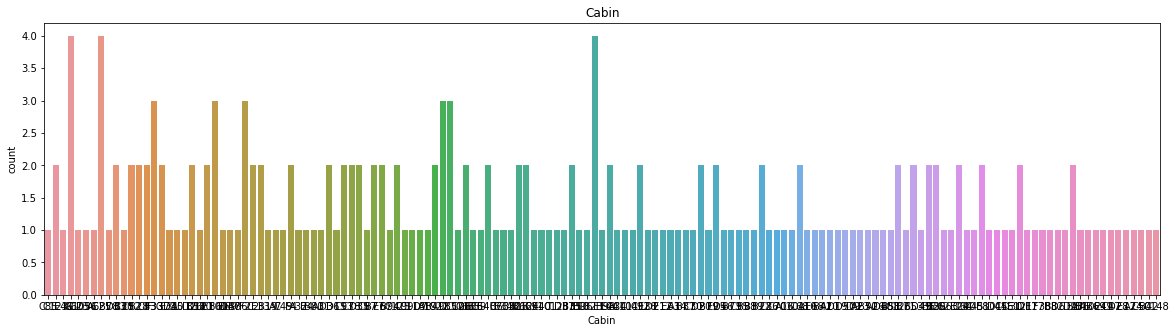

In [ ]:
# Lets check the destribution of values in Cabin column
plt.figure(figsize=(20,5))
sns.countplot(train['Cabin'])
plt.title('Cabin')
plt.show()

Lets check the Embarked field as well

In [ ]:
df = train['Embarked'].describe()
print(df)
print()
print(f"Number of non values in Embarked column: {train.Embarked.isna().sum()} \n")
print(f"Number of unique values in Embarked column: {train.Embarked.nunique()} \n")
print("Unique values in Embarked column: \n")
print(train.Embarked.unique())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Number of non values in Embarked column: 2 

Number of unique values in Embarked column: 3 

Unique values in Embarked column: 

['S' 'C' 'Q' nan]


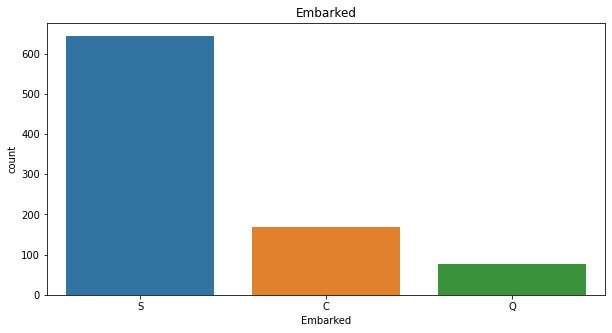

In [ ]:
# Lets check the destribution of values in Age column
plt.figure(figsize=(10,5))
sns.countplot(train['Embarked'])
plt.title('Embarked')
plt.show()


* Since the Embarked feature have only 2 missing values, lets drop these two rows (mechanism number 1)

* Since Cabin feature have 618 missing values lets create new category with that (mechanism number 4)

In [ ]:
print(f"Number of data in dataset (before): {train.shape[0]}")

# Drop 2 records that have null values for the Embarked feature
train.dropna(subset=['Embarked'], inplace=True)

print(f"Number of non values in Embarked column: {train.Embarked.isna().sum()}")
print(f"Number of data in dataset (after): {train.shape[0]}")

Number of data in dataset (before): 889
Number of non values in Embarked column: 0
Number of data in dataset (after): 889


In [ ]:
print(f"Number of unique values in Cabin column (before): {train.Cabin.nunique()}")

# Create new category for null values in the Cabin feature
values = {'Cabin': 'ZZZZ'}
train.fillna(value=values, inplace=True)

print(f"Number of non values in Cabin column: {train.Cabin.isna().sum()}")
print(f"Number of unique values in Cabin column (after): {train.Cabin.nunique()}")

print("Unique values in Cabin column: \n")
print(train.Cabin.unique())

Number of unique values in Cabin column (before): 147
Number of non values in Cabin column: 0
Number of unique values in Cabin column (after): 147
Unique values in Cabin column: 

['ZZZZ' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 

Lets double check if we still have null values or not

In [ ]:
# Calculate missing values
total_null_values_by_column = train.isna().sum()
print(total_null_values_by_column)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


We have successfully handled all the null values in the training set. We should do the same to the test set. One thing to remember is we cannot drop any records in test data (in Kaggle competitions, but it's upto you if it is your experiment) 

Before going to handling test data, lets look at another important aspect. Through out this notebook, you may have noticed that we have typed **repetitive code**. It is bothersome to re-type like that when you are doing a huge experiments. Instead we can **create methods and reuse** them when needed. Lets check it out first:

##### Creating helper methods

In [ ]:
# Instead typing the same thing again and again
# Lets make a method and call it when we need

def basic_describe_for_cat_features(feature, data=train):
  df = data[feature].describe()
  print(df)
  print()
  print(f"Number of non values in Cabin column: {data[feature].isna().sum()} \n")
  print(f"Number of unique values in Cabin column: {data[feature].nunique()} \n")
  print("Unique values in Cabin column: \n")
  print(data[feature].unique())                                         # method without return / method returning nothing

def basic_describe_for_numeric_features(features, train=train):
  """ return basic statistics of the the data"""
  df = train[features].describe()
  pd.options.display.float_format = '{:.2f}'.format
  return df                                                             # method with return / method returning data frame

def plot_count(column, train=train):
  print(train[column].value_counts())
  plt.figure(figsize=(15,5))
  sns.countplot(train[column])
  plt.title(column)
  plt.show()


def missing_values(data=train):
  # Calculate missing values
  total_null_values_by_column = data.isna().sum()
  print(total_null_values_by_column)

  # Visualize missing values
  total_null_values_by_column.plot(kind='bar', figsize=(15,6))
  plt.show()


def distplot(column, df=train):
  sns.set(style="whitegrid")
  sns.dark_palette("blue")
  plt.figure(figsize=(16,5))
  plt.title(column,fontsize=15)
  sns.distplot(df[column])
  plt.show()

        Fare
count 889.00
mean   32.10
std    49.70
min     0.00
25%     7.90
50%    14.45
75%    31.00
max   512.33


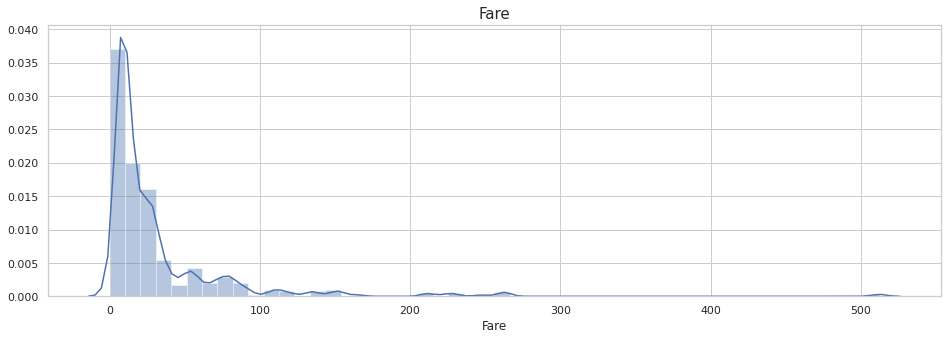

In [ ]:
df = basic_describe_for_numeric_features(['Fare'], train=train)
print(df)
distplot('Fare', train)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


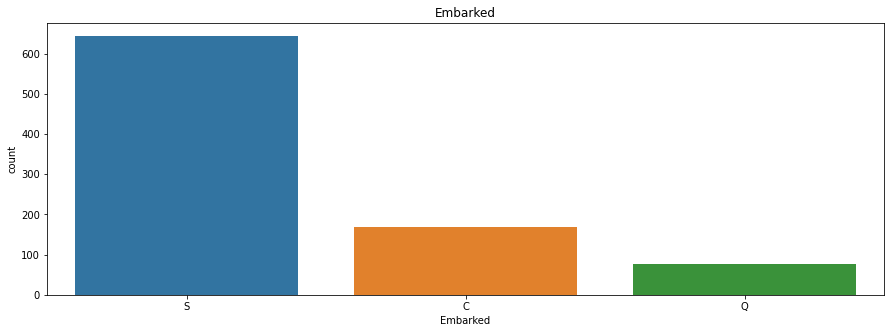

In [ ]:
plot_count('Embarked')

In [ ]:
train.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         680
Fare           247
Cabin          147
Embarked         3
dtype: int64

In [ ]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

We have to analyze each feature like we did above for three features. Look at their range, posibilities of creating new features, handling nulls etc. But for simplicity lets move on to the next step.

Important thing to notice is that name, passengerId, ticketNumber like features are almost unique to each record. Therefore taking them for classification task as feature is not valuable

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,ZZZZ,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C85,C


##### Handling categorical data

Note that there are few categorical variables in this: 
* Survived : This is Y or our label. It is binary and already in 0 and 1 form
* PClass : Ordinal. Already in numerics
* Sex : Binary. But in Letters. Therefore need to encode.
* Cabin : Nominal (Can be Ordinal too). Too many categories. If we use this as it is, we have to face "**Feature explosion**"
* Embarked : Nominal. Need to be encoded.

When we analyzed the Cabin feature you may have noticed that cabins have mainly a Letter followed by a number. Therefore, we can use that insight for creating a new feature out of the Cabin feature, considering only the Letter. Then we can reduce the categories as well. This is part of feature engineering

In [ ]:
print(f'Number of columns (before): {train.shape[1]}')

# Get dummies
cat_features = ['Embarked', 'Sex']
train = pd.get_dummies(data=train, columns=cat_features)
# train = pd.get_dummies(data=train, columns=cat_features, drop_first=True)

print(f'Number of columns (after): {train.shape[1]}')

train.head(2)

Number of columns (before): 12
Number of columns (after): 15


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,ZZZZ,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1,0,0,1,0


Notice that we don't have the Embarked and Sex fields anymore. Instead we got number of fields in respect to the number of categories those fields have. 

Here you can see, if the Sex_female is equal to 0, then Sex_male is equal to 1. i.e. variable can be linearly predicted from the other related variable with a substantial degree of accuracy. This is called "**multicollinearity**" in machine learning. It is something redundant and need to be excluded. Therefore lets drop one category from each of Sex and Embarked

In [ ]:
# Drop Embarked, and one of the categories of Embarked Variable
train.drop(['Sex_male', 'Embarked_C'], axis=1, inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_female
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,ZZZZ,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,0,0,1


**We will ignore Cabin category for now**

Now lets make a method to do all the cleaning we did till now. So that we can call it on train set and Test set separately.

In [ ]:
def clean_data(df):
  # Impute missing Age values with 29
  # In test set, Fare also have a null value. Lets just replace it with mean as well
  values = {'Age': 29, 'Fare': df['Fare'].mean()}
  df.fillna(value=values, inplace=True)

  # Convert Age column to int
  df.Age = df.Age.astype(int)

  # Drop 2 records that have null values for the Embarked feature in training set. Test set doesn't have nulls
  df.dropna(subset=['Embarked'], inplace=True)

  # Since we are ignoring Cabin feature for now we don't need to handle it.

  # Now lets handle categorical variables
  # Without dropping one column as second step, we can do it in one call using drop_first parameter
  cat_features = ['Embarked', 'Sex']
  df = pd.get_dummies(data=df, columns=cat_features, drop_first=True)

  # Lets drop unwanted columns
  # Do not drop ID in here. Because this method is common to both test and training data
  unwanted_cols = ['Cabin', 'Name', 'Ticket']
  df.drop(unwanted_cols, axis=1, inplace=True)

  # Now lets return the cleaned dataframe
  return df

In [ ]:
# Freshly initialize the train and test variables
train=pd.read_csv("train.csv")                         
test=pd.read_csv("test.csv") 

display(train.head(2))
print()
display(test.head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
# Lets clean datasets
train = clean_data(train)
test = clean_data(test)

display(train.head(2))
print()
display(test.head(2))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22,1,0,7.2500,0,1,1
1,2,1,1,38,1,0,71.2833,0,0,0


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,892,3,34,0,0,7.8292,1,0,1
1,893,3,47,1,0,7.0000,0,1,0


Lets select our features (X) and labels (Y)

Notice we don't have column "Survived" in test data. That is because we have to predict that one

In [ ]:
Y = train['Survived']

X_train = train.loc[:, 'Pclass':]     # Take all rows and columns starting from 'PClass'
X_test = test.loc[:, 'Pclass':]

display(Y.head(2))
display(X_train.head(2))
display(X_test.head(2))

0    0
1    1
Name: Survived, dtype: int64

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,22,1,0,7.2500,0,1,1
1,1,38,1,0,71.2833,0,0,0


,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34,0,0,7.8292,1,0,1
1,3,47,1,0,7.0000,0,1,0


### Build a simple model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, Y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
#  Array Shapes and how to play with them
#  https://numpy.org/devdocs/user/absolute_beginners.html